# Imports

In [201]:
import pandas as pd
import os
import numpy as np
from functools import reduce
import missingno as msno

### List Files

In [248]:
PATH='./data/'
arr = os.listdir(PATH)
arr = [i for i in arr if i not in ['.ipynb_checkpoints','currencies']]
print(arr)

['CAC40_composite.csv', 'DAX30_composite.csv', 'dowjones_composite.csv', 'hangseng_composite.csv', 'nasdaq_composite.csv', 'nikkei225_composite.csv', 'nyse_composite.csv', 's&p500_VIX.csv']


### Create Dataframes

In [249]:
dataframes = []
for idx, val in enumerate(arr):
  value = val.replace("_composite","").replace(".csv","")
  result = pd.read_csv(f"{PATH}{val}")
  result.rename(columns={'Date': 'date'}, inplace=True)
#   try:
#     result = result.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
#   except:
#     pass
  for _val in [i for i in result.columns.tolist() if i not in 'date']:
    result.rename(columns={_val: f'{_val}_{value}'}, inplace=True)
#   result = result[[i for i in result.columns.tolist() if i not in ['']]]
  print(result.columns.tolist())
  dataframes.append(result)

['date', ' value_CAC40']
['date', ' value_DAX30']
['date', 'Open_dowjones', 'High_dowjones', 'Low_dowjones', 'Close_dowjones', 'Adj Close_dowjones', 'Volume_dowjones']
['date', ' value_hangseng']
['date', 'Open_nasdaq', 'High_nasdaq', 'Low_nasdaq', 'Close_nasdaq', 'Adj Close_nasdaq', 'Volume_nasdaq']
['date', ' value_nikkei225']
['date', 'Open_nyse', 'High_nyse', 'Low_nyse', 'Close_nyse', 'Adj Close_nyse', 'Volume_nyse']
['date', ' value_s&p500_VIX']


### Outer Join on Date

In [250]:
df = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), dataframes)

In [251]:
for column in df.columns.tolist():
  if 'Close' in column:
    if 'dowjones' not in column:
      df=df.drop(column,axis=1)
for column in df.columns.tolist():
  if 'Close' in column:
    if 'Adj' not in column:
      df=df.drop(column,axis=1)

In [252]:
df.describe()

,value_CAC40,value_DAX30,Open_dowjones,High_dowjones,Low_dowjones,Adj Close_dowjones,Volume_dowjones,value_hangseng,Open_nasdaq,High_nasdaq,Low_nasdaq,Volume_nasdaq,value_nikkei225,Open_nyse,High_nyse,Low_nyse,Volume_nyse,value_s&p500_VIX
count,7821.000000,7614.000000,10107.000000,10107.000000,10107.000000,10107.000000,1.010700e+04,8441.000000,12603.000000,12603.000000,12603.000000,1.260300e+04,17822.000000,13860.000000,13860.000000,13860.000000,1.386000e+04,7823.000000
mean,3837.585066,6226.590834,3132.852689,3163.194273,3102.310756,3133.582461,1.805920e+09,15074.357288,1905.072112,1917.557938,1890.738755,9.592309e+08,10062.440868,4381.143313,4397.104270,4363.463828,1.193835e+09,19.479204
std,1311.851723,3427.922254,2423.894883,2441.614630,2406.026991,2424.192236,2.089188e+09,8029.334583,2306.073876,2321.128933,2288.979096,1.039644e+09,8598.738996,3988.449235,4007.833978,3966.805533,1.816924e+09,8.110431
min,1441.000000,1322.700000,299.209991,302.279999,296.510010,299.440002,2.600000e+06,1894.900000,54.869999,54.869999,54.869999,0.000000e+00,85.250000,347.769989,347.769989,347.769989,0.000000e+00,9.140000
25%,2869.570100,3570.740075,1039.075012,1048.290039,1028.610046,1038.554993,1.863250e+08,9246.799800,247.319999,247.879998,247.100006,0.000000e+00,1514.957500,652.794998,652.794998,652.794998,0.000000e+00,13.660000
50%,3944.909900,5754.260050,2858.449951,2895.370117,2823.290039,2858.219971,1.061900e+09,14135.200200,1058.989990,1062.939941,1053.020020,4.706400e+08,8757.050000,2618.375000,2618.375000,2618.375000,0.000000e+00,17.470000
75%,4890.580100,8196.855000,4306.074951,4347.435058,4265.590088,4307.794922,3.350655e+09,22299.630900,2521.244995,2535.234985,2497.975097,1.835255e+09,16887.685000,7252.517456,7294.699951,7197.380005,2.596448e+09,22.895000
max,6922.330100,14049.530000,10344.179688,10366.629883,10285.719727,10354.179688,8.873542e+10,33154.120000,13681.209961,13728.980469,13463.660156,7.693430e+09,38915.870000,15102.530273,15129.120117,15037.290039,1.145623e+10,82.690000


#### View Null Values

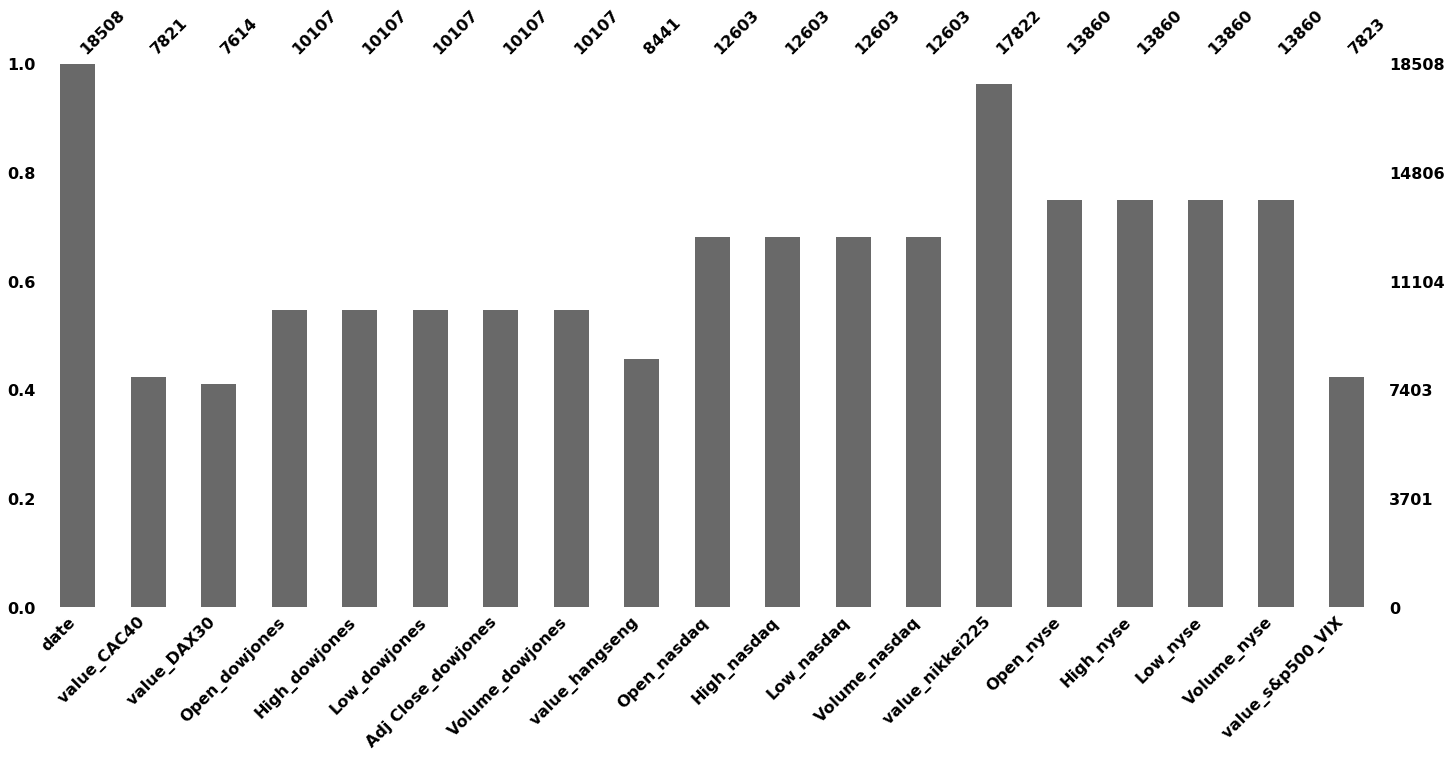

In [253]:
msno.bar(df)

### Impute missing values 

In [254]:
df['datetime'] = pd.to_datetime(df['date'])
df=df.drop('date',axis=1)

In [255]:
df['year']=df['datetime'].apply(lambda x: x.year)

In [256]:
df=df.loc[(df['year']>2010) & (df['year']<2020)]

In [257]:
df=df.reset_index(drop=True)

In [258]:
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [259]:
df=df.sort_values('datetime',ascending=True)

c:\users\brian\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\brian\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\brian\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


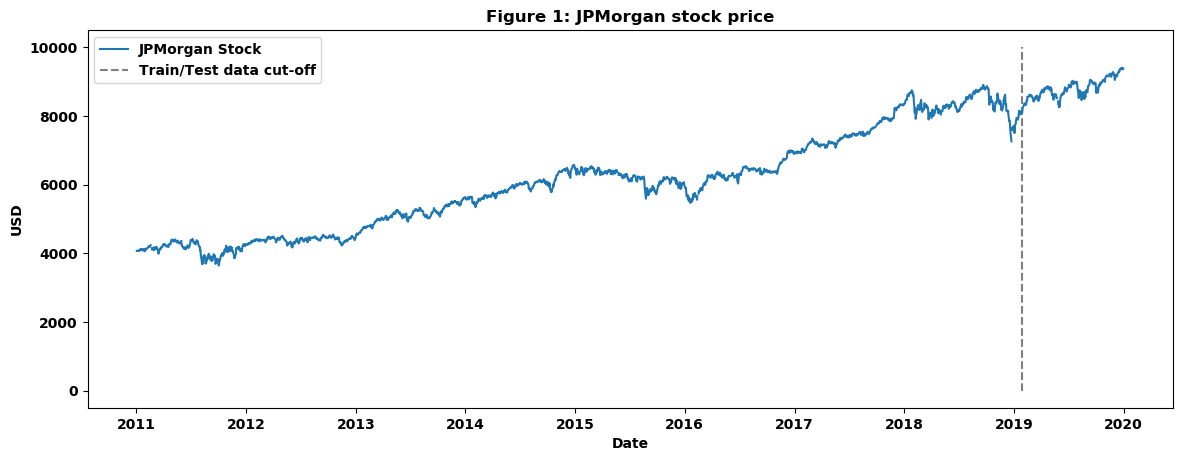

In [260]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(df.datetime, df['Adj Close_dowjones'], label='JPMorgan Stock')
plt.vlines(datetime.date(2019,1, 27), 0, 10000, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 1: JPMorgan stock price')
plt.legend()
plt.show()

In [261]:
df.rename(columns={'Adj Close_dowjones': 'price'}, inplace=True)

In [262]:
def calculate_technical_analysis_indicators(dataset):
  # Create 7 and 21 days Moving Average
  dataset['ma7'] = dataset['price'].rolling(window=7).mean()
  dataset['ma21'] = dataset['price'].rolling(window=21).mean()

  # Create MACD
  dataset['26ema'] = dataset['price'].ewm(span=26).mean()
  dataset['12ema'] = dataset['price'].ewm(span=12).mean()
  dataset['MACD'] = (dataset['12ema']-dataset['26ema'])


#   # Create Bollinger Bands
  dataset['20sd'] = dataset['price'].rolling(window=20).std()
  dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
  dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)

  # Create Exponential moving average
  dataset['ema'] = dataset['price'].ewm(com=0.5).mean()

  # Create Momentum
  dataset['momentum'] = dataset['price']-1
  
  dataset['log_momentum'] = np.log1p(dataset['price'])
  return dataset

df = calculate_technical_analysis_indicators(df)

In [263]:
df.index = pd.DatetimeIndex(df.datetime)

In [264]:
idx = pd.date_range('2011-01-03', '2019-12-31')
df = df.reindex(idx, fill_value=np.nan)

In [265]:
df.shape

(3285, 31)

In [266]:
df.head()

,value_CAC40,value_DAX30,Open_dowjones,High_dowjones,Low_dowjones,price,Volume_dowjones,value_hangseng,Open_nasdaq,High_nasdaq,...,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
2011-01-03,3900.8601,6989.7402,4033.179932,4103.100098,4033.179932,4069.439941,4.286670e+09,23436.0508,2676.649902,2704.860107,...,NaN,4069.439941,4069.439941,0.000000,NaN,NaN,NaN,4069.439941,4068.439941,8.311506
2011-01-04,3916.0300,6975.3501,4069.620117,4099.180176,4026.540039,4067.639893,4.796420e+09,23668.4805,2699.860107,2700.879883,...,NaN,4068.505301,4068.464915,-0.040386,NaN,NaN,NaN,4068.089905,4066.639893,8.311064
2011-01-05,3904.6101,6939.8198,4067.139893,4094.360107,4032.290039,4073.250000,4.764920e+09,23757.8203,2673.909912,2702.199951,...,NaN,4070.210025,4070.332535,0.122510,NaN,NaN,NaN,4071.662278,4072.250000,8.312442
2011-01-06,3904.4199,6981.3901,4072.020020,4098.370117,4036.449951,4066.399902,4.844100e+09,23786.3008,2704.379883,2712.350098,...,NaN,4069.144881,4069.091156,-0.053725,NaN,NaN,NaN,4068.110174,4065.399902,8.310759
2011-01-07,3865.5801,6947.8398,4051.600098,4104.109863,4029.340088,4072.969971,4.963110e+09,23686.6309,2712.750000,2715.959961,...,NaN,4070.031935,4070.145016,0.113081,NaN,NaN,NaN,4071.363427,4071.969971,8.312373


In [267]:
for val in df.columns.tolist():
#   df[val]=df[val].fillna(df[val].rolling(10,min_periods=1).mean())
  df[val].interpolate(method='linear', inplace=True)

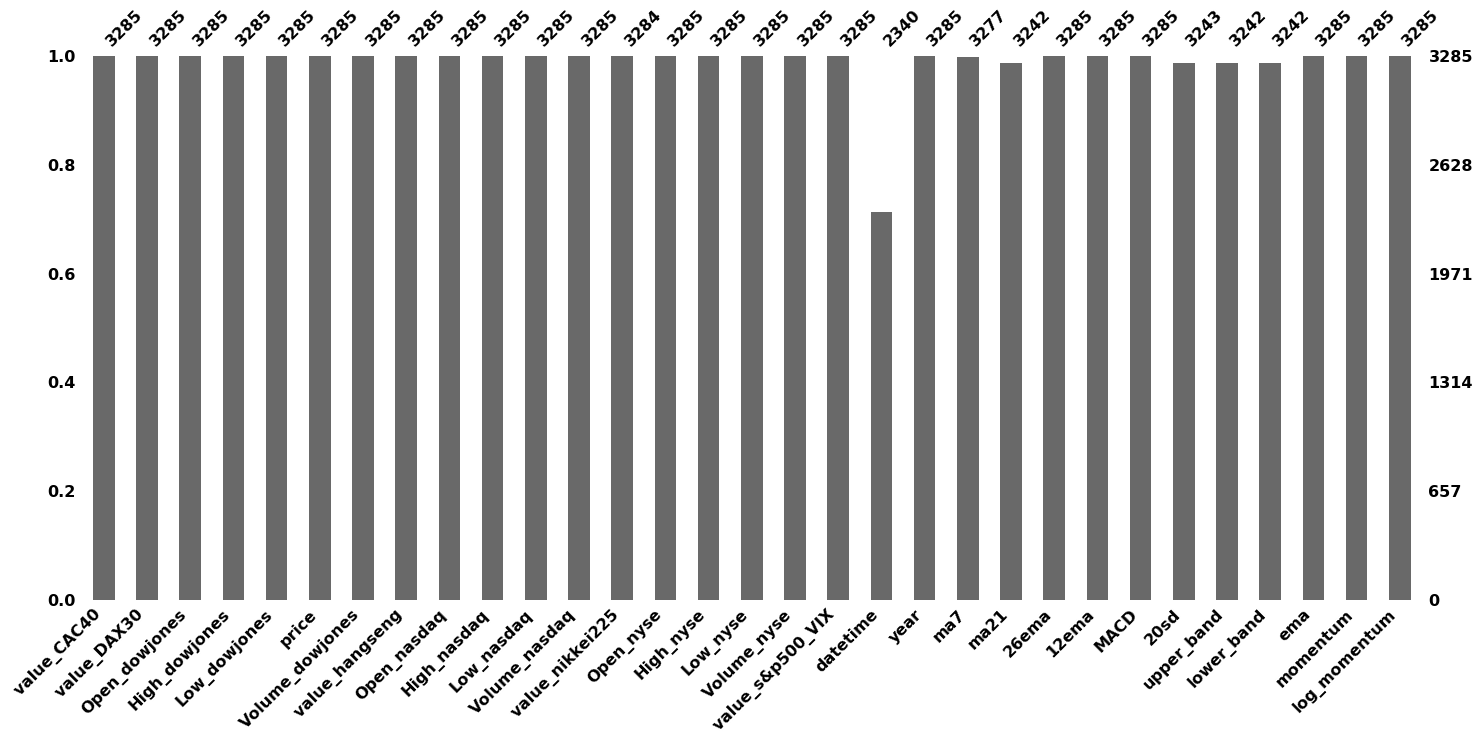

In [268]:
msno.bar(df)

In [269]:
df['datetime']=df.index

In [271]:
df['datetime'].head()

2011-01-03   2011-01-03
2011-01-04   2011-01-04
2011-01-05   2011-01-05
2011-01-06   2011-01-06
2011-01-07   2011-01-07
Freq: D, Name: datetime, dtype: datetime64[ns]

In [272]:
df=df.reset_index(drop=True)

In [273]:
df.shape

(3285, 31)

In [274]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['price'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Goldman Sachs - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()
    
    plt.show()

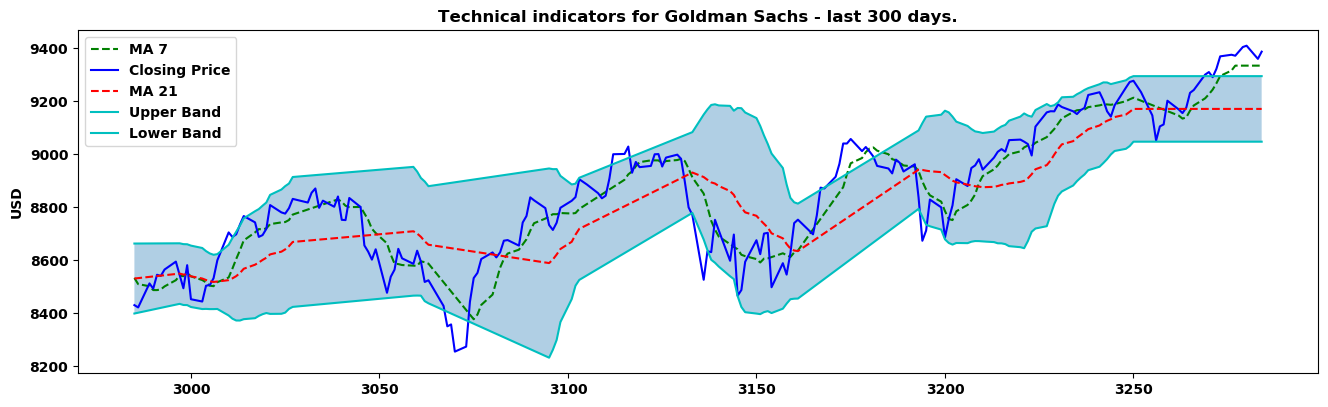

In [275]:
plot_technical_indicators(df, 300)

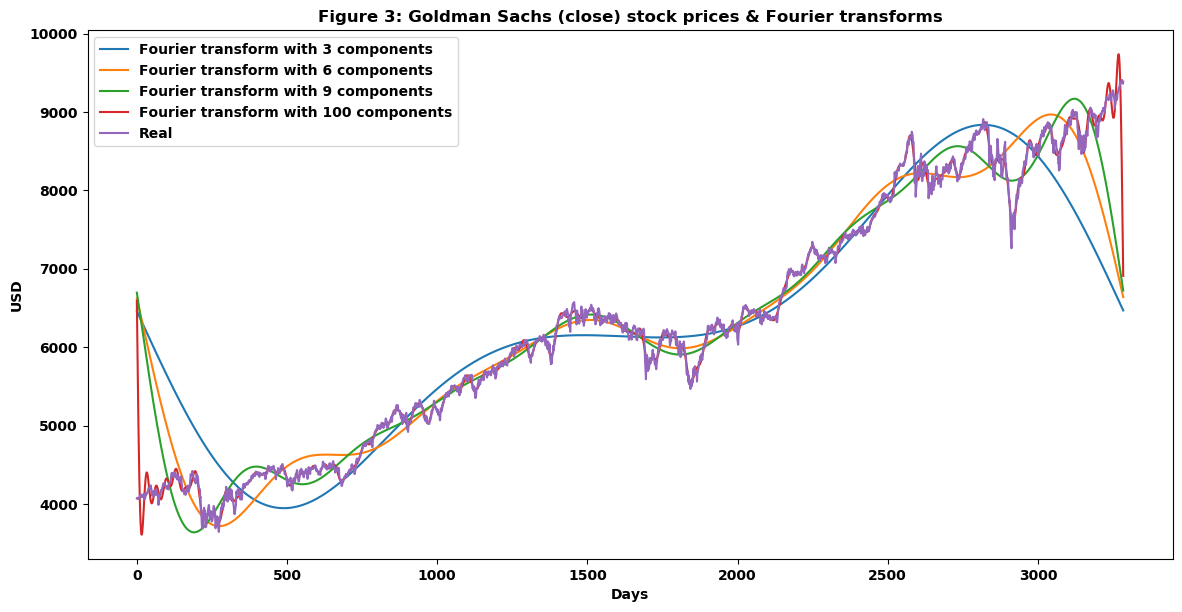

In [278]:
data_FT = df[['datetime', 'price']]
close_fft = np.fft.fft(np.asarray(data_FT['price'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['price'],  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 3: Goldman Sachs (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [279]:
"""
  TODO
  ADD NEWS ARTICLES
"""

'\n  TODO\n  ADD NEWS ARTICLES\n'

### Arima

In [288]:
df['class']=np.nan

In [290]:
train = df.loc[df['datetime']<=pd.datetime(2019,1, 27)]
test = df.loc[df['datetime']>pd.datetime(2019,1, 27)]

c:\users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
c:\users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


An ARIMA model is characterized by 3 terms: p, d, q

where,

p is the order of the AR term

q is the order of the MA term

d is the number of differencing required to make the time series stationary

Augmented Dickey Fuller test (adfuller()), from the statsmodels package.

Checks if series is stationary

In [283]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.price.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.052243
p-value: 0.953992


In [299]:
diff_1 = train['price'].diff().dropna()
print("p-value:", adfuller(diff_1.dropna())[1])

p-value: 5.299692692568497e-30


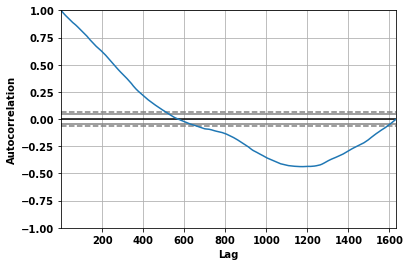

<Figure size 800x560 with 0 Axes>

In [115]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show() 

In [ ]:
# p value can be 500

In [301]:
from statsmodels.graphics.tsaplots import plot_pacf

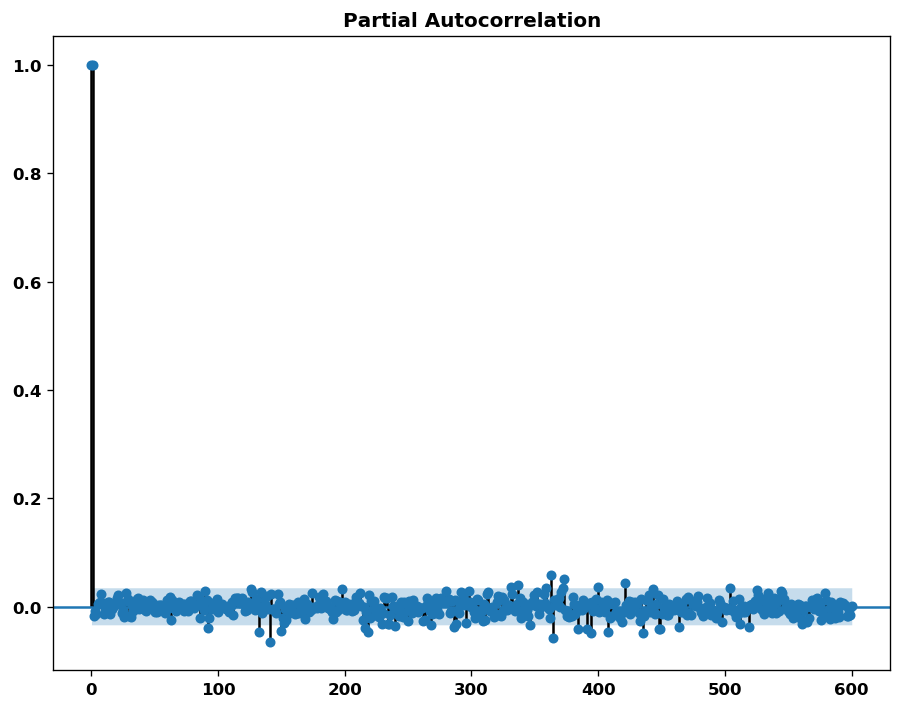

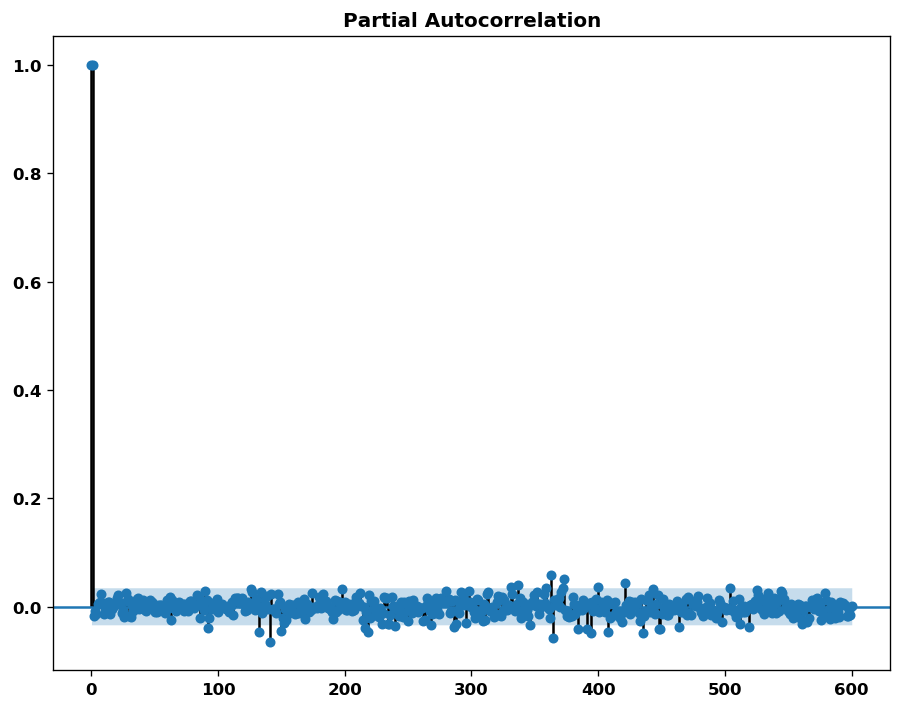

In [304]:
plot_pacf(series, lags=600)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series = df['price']
model = ARIMA(series, order=(500, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

c:\users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

c:\users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [119]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 6541.303


In [ ]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on GS stock')
plt.legend()
plt.show()